In [4]:
import pandas as pd
import math
import os
import csv
import random
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
data_dir = 'data'

In [6]:
def read_advanced_data(season_num, team_name):
    season = "{}-{}".format(season_num, season_num + 1)
    advanced = pd.read_csv(os.path.join(data_dir, season, team_name, 'Advanced.csv'), index_col = 1)
    advanced.index = advanced.index.map(lambda x: x.split('\\')[0])
    advanced = advanced[advanced['PER'] > 0]
    advanced['norm_OWS'] = (advanced['OWS'] - advanced['OWS'].min()) / (advanced['OWS'].max() - advanced['OWS'].min())
    advanced['norm_DWS'] = (advanced['DWS'] - advanced['DWS'].min()) / (advanced['DWS'].max() - advanced['DWS'].min())
    advanced['norm_PER'] = (advanced['PER'] - advanced['PER'].min()) / (advanced['PER'].max() - advanced['PER'].min())
    total_importance_value = advanced['norm_OWS'].sum() + advanced['norm_DWS'].sum()
    advanced['importance'] = (advanced['norm_OWS'] + advanced['norm_DWS']) / total_importance_value
    return advanced[['norm_OWS', 'norm_DWS', 'norm_PER', 'importance']]


In [27]:
def plot_team_player(df):
    # x represents the player offense stat
    X = df['norm_OWS'].values
    # y represents the player defense stat
    Y = df['norm_DWS'].values
    # eff represents the player efficiency rate
    eff = df['norm_PER'] ** 2 * 400
    importance = df['importance']
    
    mid_eff = eff.max() * 0.3
    mid_im = importance.max() * 0.35

    colors = np.random.rand(df.shape[0])
    
    fig = plt.figure(figsize=(8,6), dpi=100)
    plt.xlabel('OWS')
    plt.ylabel('DWS')
    plt.scatter(X, Y, s = eff, c = colors, alpha = 0.5)
    
    for label, x, y, s, im in zip(df.index, X, Y, eff, importance):
        if s < mid_eff and im < mid_im:
            continue
        plt.annotate(
            '{}:{:.2f}'.format(label, im),
            xy=(x, y), xytext=(0, 100),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='none', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.show()

# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate

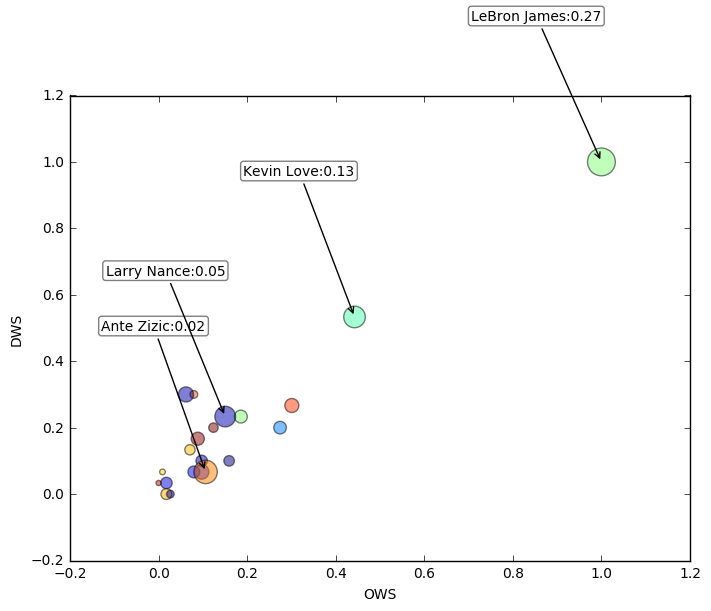

In [28]:
df = read_advanced_data(17, 'Cleveland_Cavaliers')
plot_team_player(df)

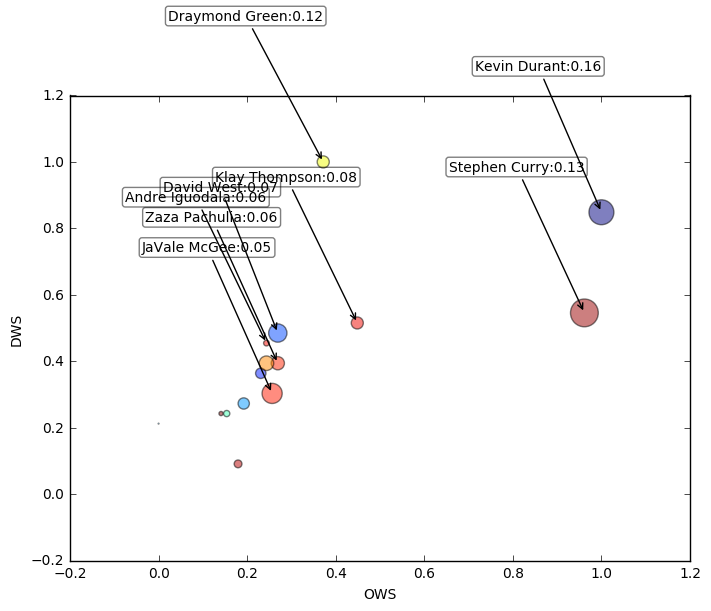

In [29]:
df = read_advanced_data(17, 'Golden_State_Warriors')
plot_team_player(df)

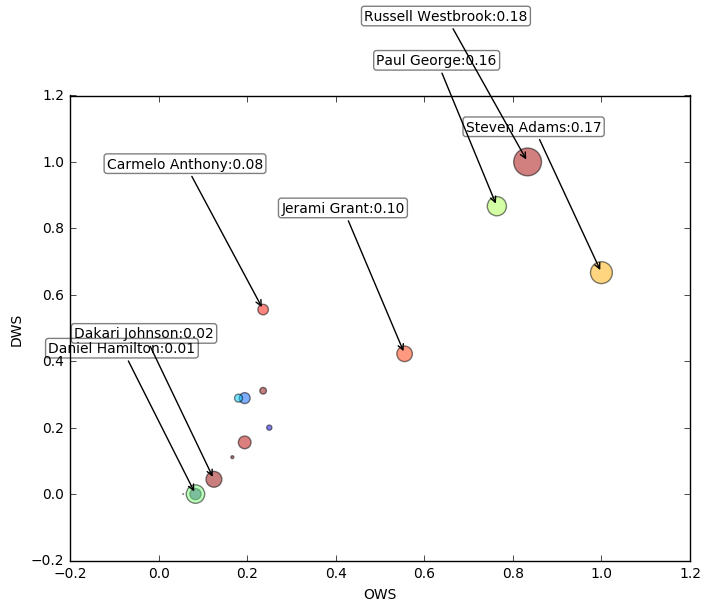

In [30]:
df = read_advanced_data(17, 'Oklahoma_City_Thunder')
plot_team_player(df)

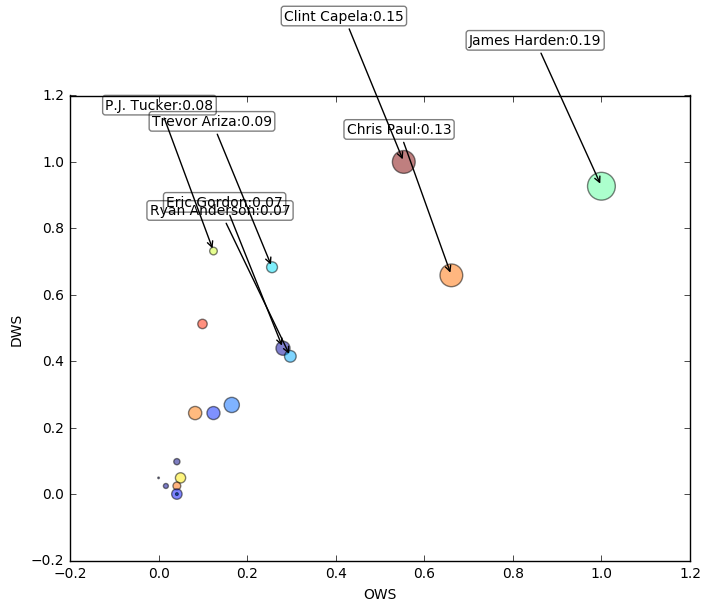

In [31]:
df = read_advanced_data(17, 'Houston_Rockets')
plot_team_player(df)